In [1]:
import pandas

In [3]:
kittens = pandas.Series(data=[1,3,4,2])
happiness = pandas.Series(data=[2,6,7,4])

In [4]:
df = pandas.DataFrame({'kittens' : kittens, 'happiness':happiness})
df

,happiness,kittens
0,2,1
1,6,3
2,7,4
3,4,2


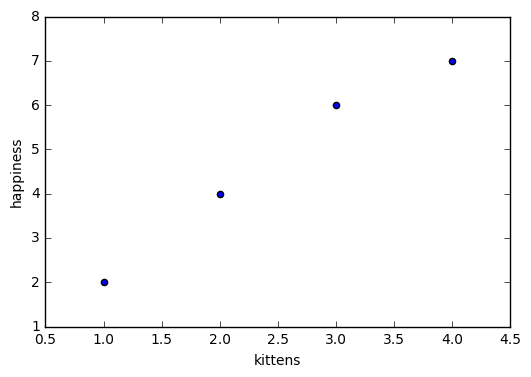

In [5]:
%matplotlib inline
df.plot.scatter('kittens' , 'happiness')

In [6]:
import sklearn.linear_model

In [8]:
regressor = sklearn.linear_model.TheilSenRegressor()

In [9]:
X = df[['kittens']]
y = df.happiness

In [10]:
X

,kittens
0,1
1,3
2,4
3,2


In [11]:
y

0    2
1    6
2    7
3    4
Name: happiness, dtype: int64

In [12]:
regressor.fit(X,y)

TheilSenRegressor(copy_X=True, fit_intercept=True, max_iter=300,
         max_subpopulation=10000, n_jobs=1, n_subsamples=None,
         random_state=None, tol=0.001, verbose=False)

In [13]:
regressor.predict([[1] , [2] ])

array([ 2.0169306 ,  3.99292199])

In [16]:
regressor.predict([[10]])

array([ 19.8008531])

In [17]:
regressor.coef_

array([ 1.97599139])

In [18]:
regressor.intercept_

0.040939212419845591

# sacramento house prices

we will predict prices based on 
* bedrooms 
* bathrooms 
* other stuff

In [19]:
sacramento = pandas.read_csv ('/Users/nerenevaz/Desktop/SYDDAT7/SYD_DAT_7/data/Sacramento-real-estate-transactions.csv')
sacramento

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
5,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Condo,Wed May 21 00:00:00 EDT 2008,89921,38.662595,-121.327813
6,6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3,2,1104,Residential,Wed May 21 00:00:00 EDT 2008,90895,38.681659,-121.351705
7,2561 19TH AVE,SACRAMENTO,95820,CA,3,1,1177,Residential,Wed May 21 00:00:00 EDT 2008,91002,38.535092,-121.481367
8,11150 TRINITY RIVER DR Unit 114,RANCHO CORDOVA,95670,CA,2,2,941,Condo,Wed May 21 00:00:00 EDT 2008,94905,38.621188,-121.270555
9,7325 10TH ST,RIO LINDA,95673,CA,3,2,1146,Residential,Wed May 21 00:00:00 EDT 2008,98937,38.700909,-121.442979


In [20]:
ransac = sklearn.linear_model.RANSACRegressor()

In [22]:
X = sacramento[['beds' ,'baths' , 'sq__ft' , 'latitude' , 'longitude' ,'zip']]
y = sacramento.price

In [23]:
ransac.fit(X,y)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        max_trials=100, min_samples=None, random_state=None,
        residual_metric=None, residual_threshold=None, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

In [25]:
ransac.estimator_.coef_

array([  -4718.23939852,   -9384.63993251,     155.47865443,
         21978.53401707, -149707.34027771,    -242.46124277])

In [26]:
ransac.estimator_.intercept_

4197304.669156828

In [27]:
OLS = sklearn.linear_model.LinearRegression()

In [28]:
X = sacramento[['beds' ,'baths' , 'sq__ft' ]]
y = sacramento.price

In [30]:
OLS.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
OLS.coef_

array([ -8.01164405e+03,   6.18961061e+04,   1.93133645e+01])

In [33]:
OLS.intercept_

122108.40091355979

In [35]:
["%.2f" % (c,) for c in OLS.coef_]

['-8011.64', '61896.11', '19.31']

In [36]:
predictions = OLS.predict(X)
predictions

array([ 184127.19166465,  182508.2712587 ,  183354.6570853 ,
        184436.2054964 ,  183373.97044978,  181639.16985693,
        243187.63543902,  182701.40490354,  248051.20107826,
        243998.79674734,  239421.52936466,  246760.60786854,
        192814.80347171,  179669.20667957,  249615.58360146,
        251778.68042366,  184281.69858053,  183335.34372081,
        179337.47727265,  248054.60328896,  243458.02254179,
        239521.49839777,  237802.6089587 ,  252786.37758752,
        239267.02244878,  242878.62160727,  178568.34490399,
        243477.33590628,  240506.47998645,  245968.7599247 ,
        249943.91079769,  244114.67693424,  248518.12403657,
        243419.39581282,  249943.91079769,  249252.03188696,
        242762.74142037,  242283.30951897,  235987.15269722,
        190671.020014  ,  255061.95238592,  245176.91198086,
        242260.59394379,  250021.16425562,  244504.34643462,
        173588.89907784,  244369.15288323,  189715.55842189,
        245836.96858401,

In [37]:
import matplotlib.pyplot

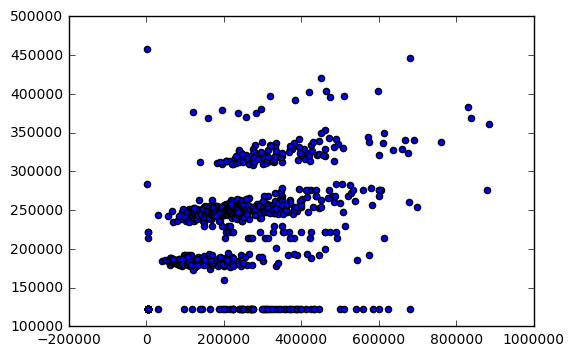

In [38]:
matplotlib.pyplot.scatter(sacramento.price,predictions)

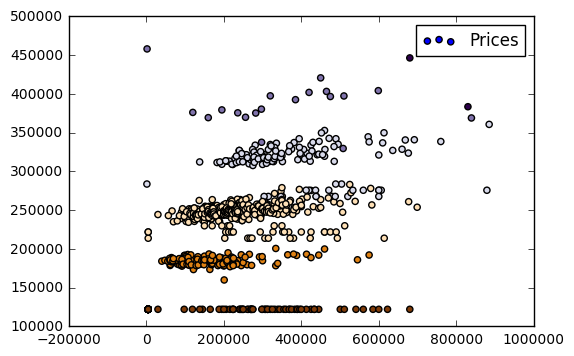

In [43]:
(fig,ax) = matplotlib.pyplot.subplots()
ax.scatter(sacramento.price,predictions, cmap=matplotlib.pylab.cm.PuOr , c=sacramento.baths, label='Prices')
ax.set_xlabel = ('Actual price')
ax.set_ylabel = ('Predicted Price')
ax.legend(loc='best')

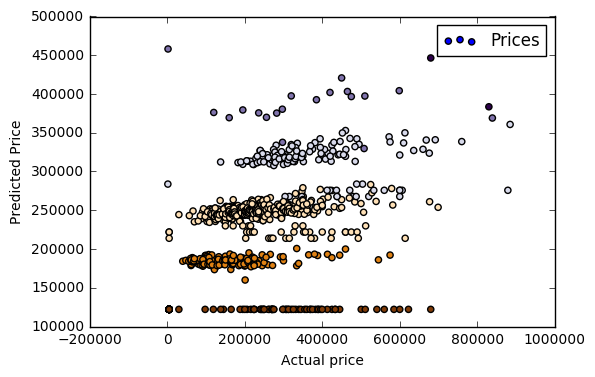

In [45]:
def colorme(x):
    if x =='Residential' : return 'blue'
    if x == 'Condo' : return 'orange'
    if x == 'Multi-Family': return "pink"
    return "yellow"
(fig,ax) = matplotlib.pyplot.subplots()
ax.scatter(sacramento.price,predictions, cmap=matplotlib.pylab.cm.PuOr , c=sacramento.baths, label='Prices')
ax.set_xlabel('Actual price')
ax.set_ylabel('Predicted Price')
ax.legend(loc='best')